# Tarea: Aprendizaje no supervisado

Nancy Patricia Girón Muñoz

## Importando paquetes

In [9]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import imageio as imio

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_openml
from sklearn import preprocessing as prepro

from sklearn.decomposition import PCA

## Importar datos

In [2]:
images_inception_features = './training_inception_features_array.npy'
training_image_labels_array = './training_image_labels_array.npy'
training_image_names_array = './training_image_names_array.npy'

In [3]:
TRAIN_DICTIONARY_KEYS = ["images", "label","features"]

training_set_dict = dict()
    
training_set_dict['images_name'] = np.load(training_image_names_array)
training_set_dict['label'] = np.load(training_image_labels_array)
training_set_dict['features'] = np.load(images_inception_features)

In [4]:
## Cargamos las features y las labes de cada feature
features = training_set_dict['features']
labels = training_set_dict['label']
images_name = training_set_dict['images_name']

In [5]:
len(features)

10222

In [6]:
labels_unique = np.unique(labels)
print(len(labels_unique))

120


In [7]:
labels.shape

(10222,)

In [8]:
features.shape

(10222, 2048)

# Normalización de datos

In [12]:
stscaler = prepro.StandardScaler()
Normalizada = stscaler.fit_transform(features)

# Implementación PCA (2 dimensiones)

In [13]:
#### PCA a 2 dimensiones ######
pca = PCA(n_components=2)
pca.fit(Normalizada) 

X2D = pca.fit_transform(Normalizada)#new features matrix

In [14]:
print(Normalizada.shape)
print(X2D.shape)

(10222, 2048)
(10222, 2)


In [15]:
label_encoder = prepro.LabelEncoder()
label_encoder.fit(labels)
labels_enc = label_encoder.transform(labels)

In [16]:
print(labels_enc) 

[19 37 85 ...  3 75 28]


# Clustering

Text(0, 0.5, 'component 2')

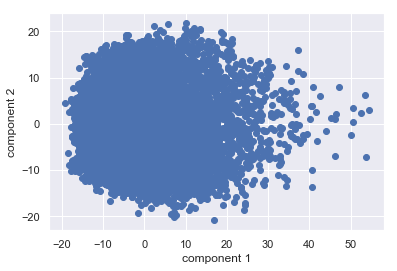

In [17]:
plt.scatter(X2D[:, 0], X2D[:, 1])
plt.xlabel('component 1')
plt.ylabel('component 2')

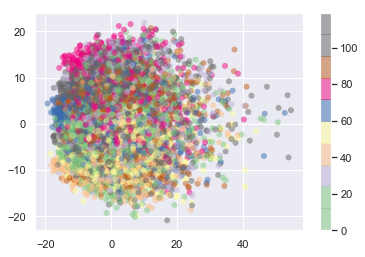

In [21]:
plt.scatter(X2D[:, 0], X2D[:, 1],
            c=labels_enc, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.colorbar()

In [22]:
from sklearn.cluster import KMeans

In [29]:
## K-means
kmeans = KMeans(n_clusters=120, random_state=0).fit(X2D)
kmeans.predict(X2D)

array([ 78, 106,  35, ...,  44,  95,  47], dtype=int32)

In [30]:
clusters = kmeans.cluster_centers_ 
print(clusters)

[[-2.73564744e+00  1.25070181e+01]
 [ 1.40862501e+00 -3.20033932e+00]
 [ 2.19216843e+01  9.78029823e+00]
 [-1.44281340e+01 -3.31491256e+00]
 [ 9.24011421e+00 -7.45751810e+00]
 [-7.79928875e+00 -1.20013466e+01]
 [ 2.41349068e+01 -3.05556440e+00]
 [-9.38910866e+00  1.75850666e+00]
 [ 6.52461958e+00  5.64290762e+00]
 [-4.29614782e+00  1.69869602e+00]
 [-1.87268540e-01 -5.96744061e+00]
 [ 1.10446844e+01  1.22263451e+01]
 [-9.75984859e+00 -6.98646402e+00]
 [-8.42769623e-01  5.18193102e+00]
 [ 4.98698616e+00 -1.27078800e+01]
 [ 4.32279930e+01  8.70010138e-01]
 [-5.52872038e+00  4.86138964e+00]
 [ 1.25319300e+01  5.47147449e-03]
 [-4.89657259e+00 -4.89445829e+00]
 [ 1.82561703e+01 -6.35040855e+00]
 [ 2.87382641e+01  1.40327573e+00]
 [-9.94506776e-01  2.01448798e+00]
 [-1.54750795e+01  3.58016515e+00]
 [-1.15662136e+01  1.36323414e+01]
 [ 6.73378801e+00  1.20476961e+01]
 [-2.26805615e+00 -1.08415480e+01]
 [-8.75832081e+00 -1.62738490e+00]
 [ 7.66815615e+00 -3.41279507e+00]
 [ 3.34794879e-01  8

In [31]:
kmeans.cluster_centers_.shape

(120, 2)

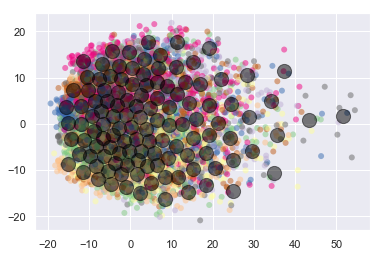

In [33]:
plt.scatter(X2D[:, 0], X2D[:, 1],
            c=labels_enc, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 120))
plt.scatter(clusters[:, 0], clusters[:, 1], c='black', s=200, alpha=0.5);